# Turkey Student Evaluation Analysis - Clustering

-  From this Analysis on Turkey Student Data using KMeans and Hierarchical Clustering Process, We identify the count of Positive, Negative and Neutral values depend on the data provided. Also its value count and dependancy nature on each variable.

### Dataset Information

* This data set contains a Total 5820 Evaluation Scores provided by students from Gazi University in Ankara (Turkey). 
* There is a Total of 28 Course specific questions and additional 5 attributes.



**Creator**: Anandan Raju

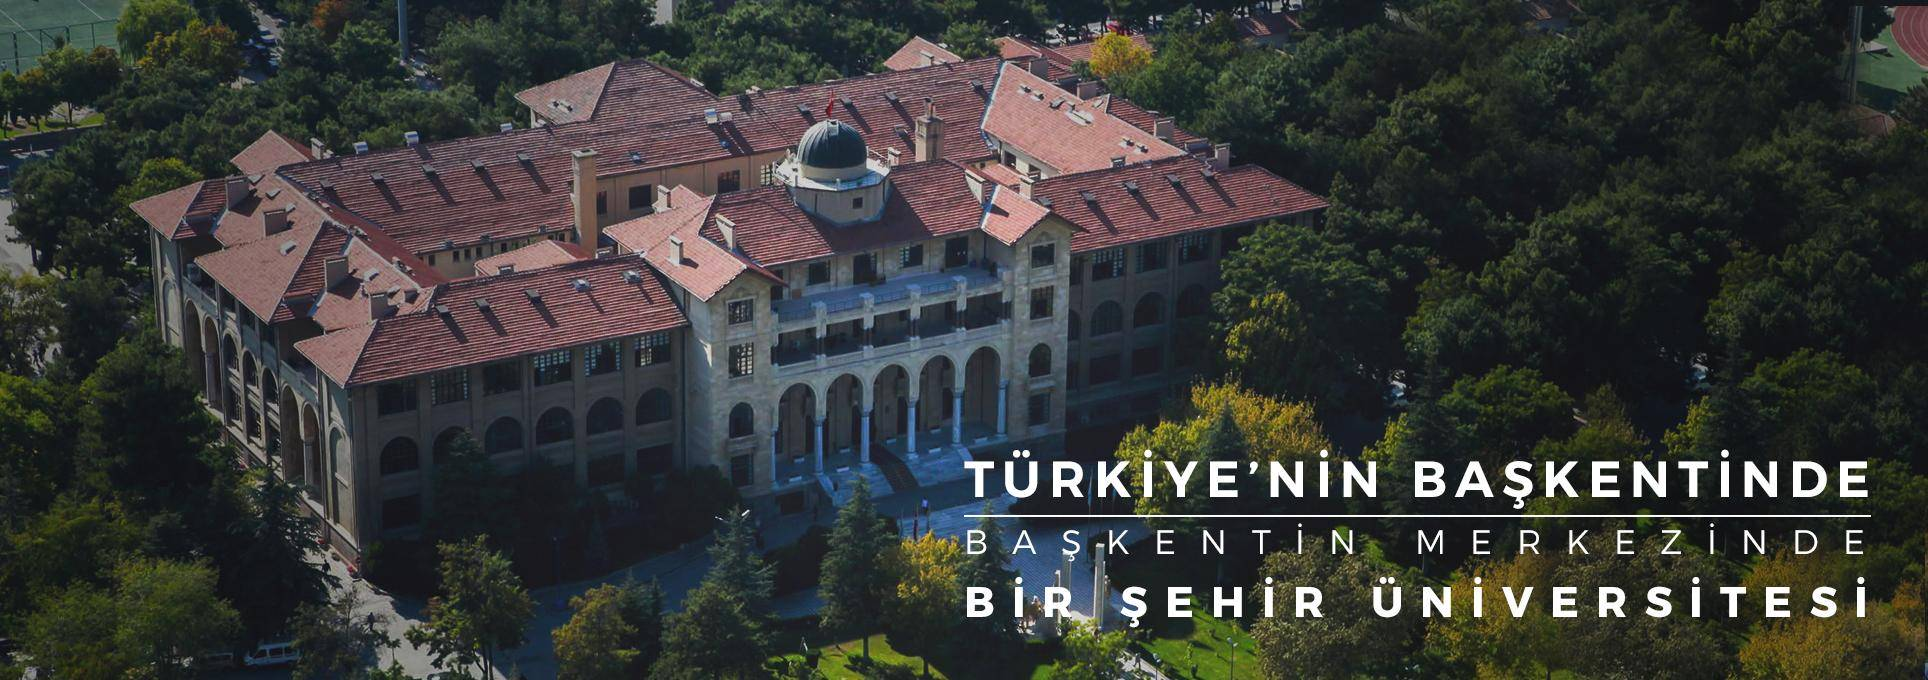

### Attribute Informations:

1.  **Instr**: Instructor's identifier; values taken from {1,2,3} 
2.  **Class**: Course code (descriptor); values taken from {1-13} 
3.  **Repeat**: Number of times the student is taking this course; values taken from {0,1,2,3,...}
4.  **Attendance**: Code of the level of attendance; values from {0, 1, 2, 3, 4}
5.  **Difficulty**: Level of difficulty of the course as perceived by the student; values taken from {1,2,3,4,5}
6.  **Q1**: The semester course content, teaching method and evaluation system were provided at the start.
7.  **Q2**: The course aims and objectives were clearly stated at the beginning of the period.
8.  **Q3**: The course was worth the amount of credit assigned to it.
9.  **Q4**: The course was taught according to the syllabus announced on the first day of class.
10. **Q5**: The class discussions, homework assignments, applications and studies were satisfactory.
11. **Q6**: The textbook and other courses resources were sufficient and up to date.
12. **Q7**: The course allowed field work, applications, laboratory, discussion and other studies.
13. **Q8**: The quizzes, assignments, projects and exams contributed to helping the learning.
14. **Q9**: I greatly enjoyed the class and was eager to actively participate during the lectures.
15. **Q10**: My initial expectations about the course were met at the end of the period or year.
16. **Q11**: The course was relevant and beneficial to my professional development.
17. **Q12**: The course helped me look at life and the world with a new perspective.
18. **Q13**: The Instructor's knowledge was relevant and up to date.
19. **Q14**: The Instructor came prepared for classes.
20. **Q15**: The Instructor taught in accordance with the announced lesson plan.
21. **Q16**: The Instructor was committed to the course and was understandable.
22. **Q17**: The Instructor arrived on time for classes.
23. **Q18**: The Instructor has a smooth and easy to follow delivery/speech.
24. **Q19**: The Instructor made effective use of class hours.
25. **Q20**: The Instructor explained the course and was eager to be helpful to students.
26. **Q21**: The Instructor demonstrated a positive approach to students.
27. **Q22**: The Instructor was open and respectful of the views of students about the course.
28. **Q23**: The Instructor encouraged participation in the course.
29. **Q24**: The Instructor gave relevant homework assignments/projects, and helped/guided students.
30. **Q25**: The Instructor responded to questions about the course inside and outside of the course.
31. **Q26**: The Instructor's evaluation system (midterm and final questions, projects, assignments, etc.) effectively measured the course objectives.
32. **Q27**: The Instructor provided solutions to exams and discussed them with students.
33. **Q28**: The Instructor treated all students in a right and objective manner.

* Q1-Q28 are all Likert-type, meaning that the values are taken from {1,2,3,4,5}

# Table of Contents

1. Import Libraries
2. Checking DataSet
3. Exploratory Data Analysis
4. Correlation Matrix
    * Principal Component Analysis (PCA)
5. Model Training
    * KMeans with PCA-X
    * KMeans with Actual-X
    * Agglomerative Clustering
6. Summary

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 2. Checking Dataset

In [2]:
df = pd.read_csv("Turkey_Student_Evaluation_Generic.csv")
df.head()

,Instr,Class,Repeat,Attendance,Difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [3]:
df.shape

(5820, 33)

In [4]:
df.describe().style.background_gradient(cmap = "binary")

,Instr,Class,Repeat,Attendance,Difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,3.107388,3.066323,3.041924,3.165979,3.090722,3.183849,3.035567,3.242784,3.290893,3.287285,3.169588,3.398454,3.222509,3.261684,3.285395,3.307388,3.317526,3.201890,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,1.280807,1.279097,1.283481,1.268930,1.275309,1.295443,1.305772,1.264201,1.255373,1.253122,1.288015,1.267530,1.279799,1.268442,1.276848,1.269974,1.268358,1.272590,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
corr = df.corr()
corr

,Instr,Class,Repeat,Attendance,Difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
Instr,1.000000,-0.039871,0.112763,-0.107231,-0.058368,-0.128931,-0.127070,-0.108949,-0.113222,-0.135606,...,-0.112485,-0.086831,-0.078101,-0.080586,-0.118889,-0.128880,-0.083563,-0.103499,-0.107664,-0.081672
Class,-0.039871,1.000000,0.091527,-0.016312,-0.044899,-0.029542,-0.033274,-0.021534,-0.030165,-0.036584,...,-0.018727,-0.031234,-0.022758,-0.016553,-0.025983,-0.036712,-0.027816,-0.029491,-0.022576,-0.037364
Repeat,0.112763,0.091527,1.000000,-0.078086,0.110493,-0.024708,-0.041707,-0.035704,-0.033613,-0.031770,...,-0.045568,-0.042624,-0.046262,-0.045464,-0.041233,-0.033618,-0.049918,-0.035518,-0.032457,-0.044900
Attendance,-0.107231,-0.016312,-0.078086,1.000000,0.436792,0.105266,0.149258,0.178393,0.138108,0.149747,...,0.190694,0.195166,0.204802,0.207740,0.177814,0.163546,0.204435,0.172695,0.144687,0.200150
Difficulty,-0.058368,-0.044899,0.110493,0.436792,1.000000,0.052120,0.065031,0.071457,0.062171,0.064181,...,0.080017,0.091051,0.095628,0.099543,0.075317,0.072609,0.099682,0.064456,0.059370,0.090876
Q1,-0.128931,-0.029542,-0.024708,0.105266,0.052120,1.000000,0.866138,0.767381,0.849773,0.804757,...,0.699370,0.685299,0.673770,0.670702,0.728770,0.732167,0.672120,0.698924,0.709639,0.658873
Q2,-0.127070,-0.033274,-0.041707,0.149258,0.065031,0.866138,1.000000,0.850766,0.873556,0.861803,...,0.788643,0.778299,0.764986,0.766872,0.801172,0.797314,0.766622,0.778405,0.768125,0.752515
Q3,-0.108949,-0.021534,-0.035704,0.178393,0.071457,0.767381,0.850766,1.000000,0.826342,0.843329,...,0.799645,0.795384,0.791391,0.789747,0.799752,0.792241,0.793341,0.796296,0.765633,0.781299
Q4,-0.113222,-0.030165,-0.033613,0.138108,0.062171,0.849773,0.873556,0.826342,1.000000,0.867861,...,0.769526,0.759810,0.752171,0.748081,0.788852,0.789508,0.752370,0.766368,0.759536,0.742186
Q5,-0.135606,-0.036584,-0.031770,0.149747,0.064181,0.804757,0.861803,0.843329,0.867861,1.000000,...,0.809381,0.794833,0.780245,0.778777,0.831221,0.830279,0.782437,0.804916,0.791877,0.767411


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Instr       5820 non-null   int64
 1   Class       5820 non-null   int64
 2   Repeat      5820 non-null   int64
 3   Attendance  5820 non-null   int64
 4   Difficulty  5820 non-null   int64
 5   Q1          5820 non-null   int64
 6   Q2          5820 non-null   int64
 7   Q3          5820 non-null   int64
 8   Q4          5820 non-null   int64
 9   Q5          5820 non-null   int64
 10  Q6          5820 non-null   int64
 11  Q7          5820 non-null   int64
 12  Q8          5820 non-null   int64
 13  Q9          5820 non-null   int64
 14  Q10         5820 non-null   int64
 15  Q11         5820 non-null   int64
 16  Q12         5820 non-null   int64
 17  Q13         5820 non-null   int64
 18  Q14         5820 non-null   int64
 19  Q15         5820 non-null   int64
 20  Q16         5820 non-null   in

In [7]:
df.isnull().sum()

Instr         0
Class         0
Repeat        0
Attendance    0
Difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64

# 3. Exploratory Data Analysis

In [8]:
plt.style.use("seaborn")

<AxesSubplot:xlabel='Instr', ylabel='count'>

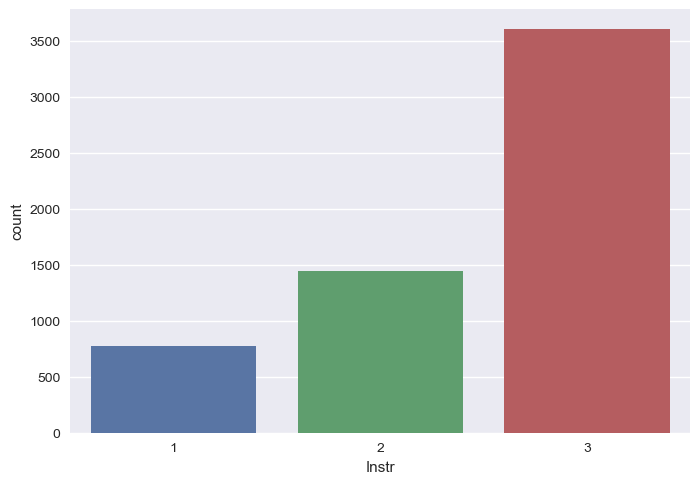

In [9]:
sns.countplot(df['Instr'])

<AxesSubplot:xlabel='Repeat', ylabel='count'>

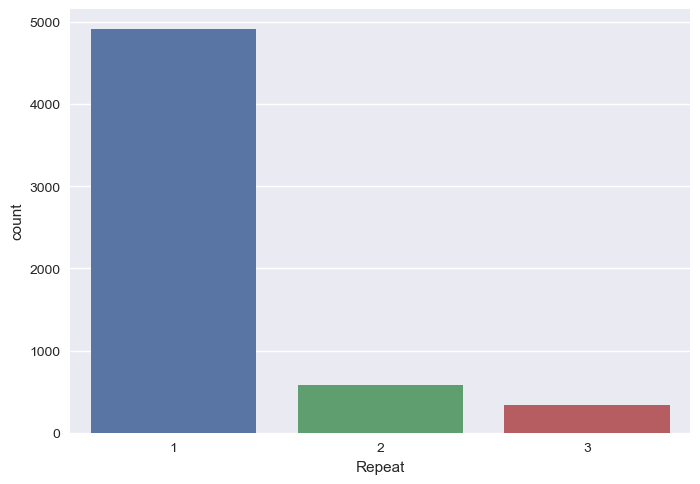

In [10]:
sns.countplot(df['Repeat'])

<AxesSubplot:xlabel='Attendance', ylabel='count'>

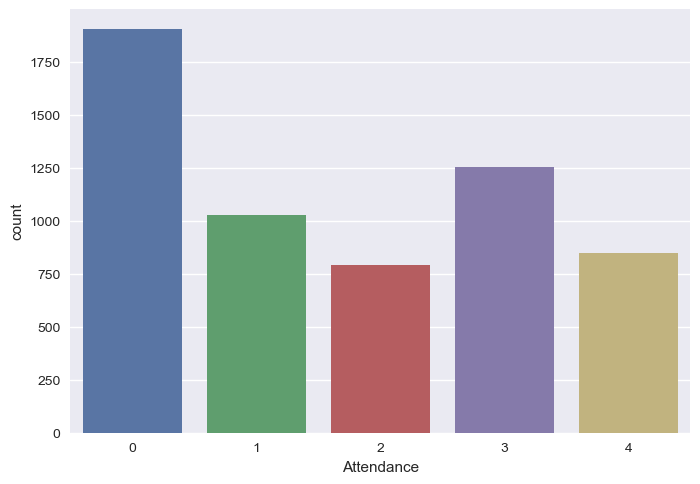

In [11]:
sns.countplot(df['Attendance'])

<AxesSubplot:xlabel='Difficulty', ylabel='count'>

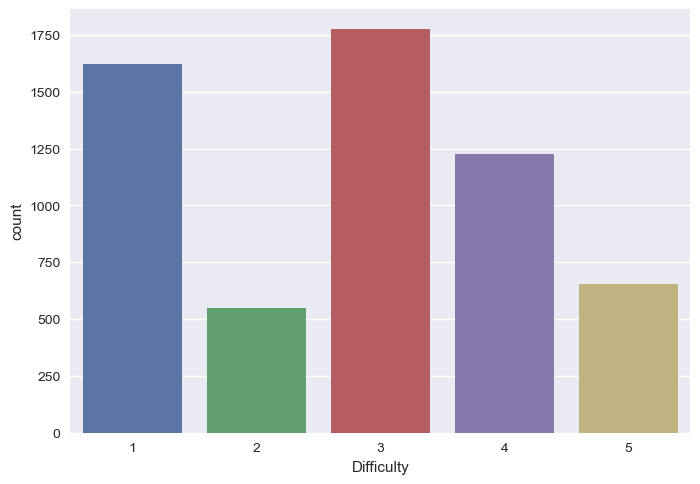

In [12]:
sns.countplot(df['Difficulty'])

<AxesSubplot:xlabel='Class', ylabel='count'>

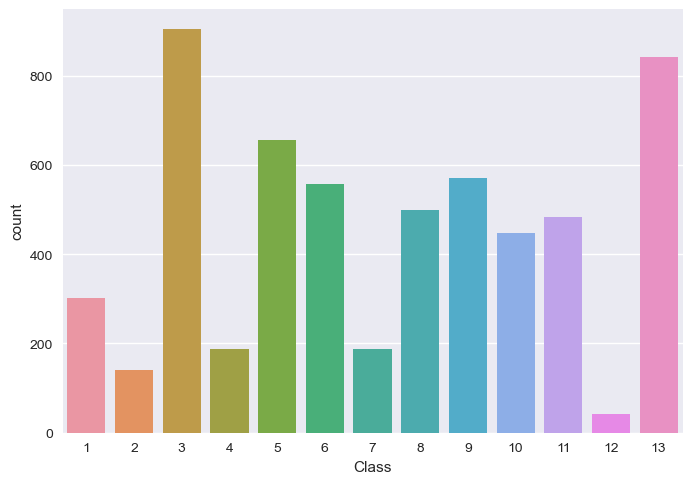

In [13]:
sns.countplot(df['Class'])

In [14]:
x_qns = df.iloc[:,5:33]
q_mean = x_qns.mean(axis=0)
total_mean = q_mean.mean()

In [15]:
q_mean = q_mean.to_frame('mean')
q_mean.reset_index(level=0, inplace=True)
q_mean.head()

,index,mean
0,Q1,2.929897
1,Q2,3.073883
2,Q3,3.178694
3,Q4,3.082474
4,Q5,3.105842


In [16]:
total_mean

3.1861561119293085

<AxesSubplot:xlabel='index', ylabel='mean'>

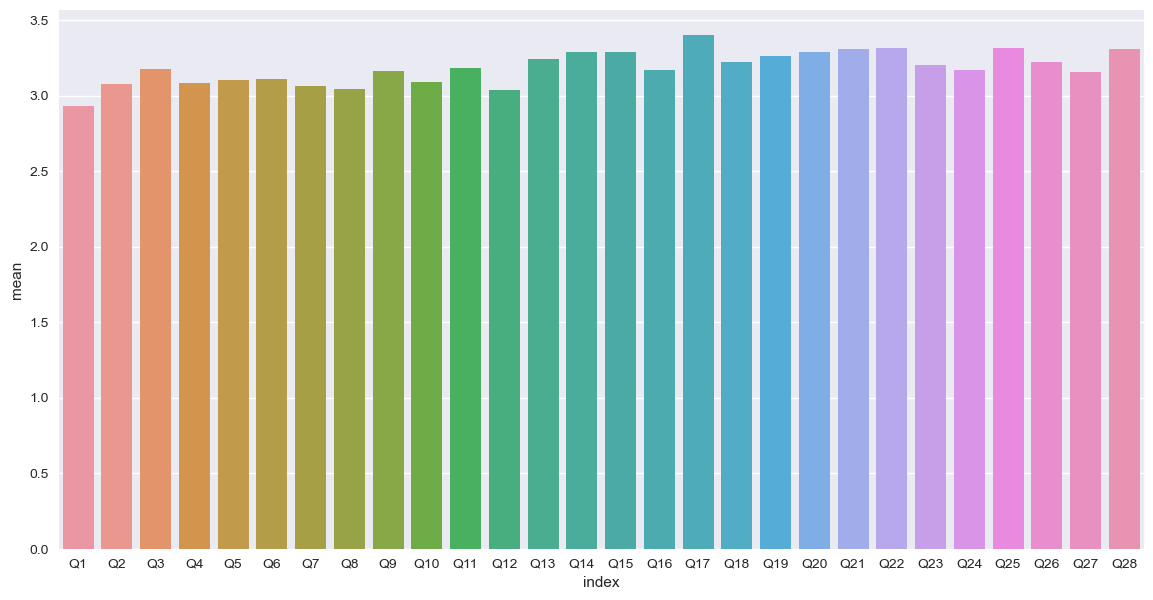

In [17]:
plt.figure(figsize=(14,7))
sns.barplot(x='index', y='mean', data=q_mean)

<AxesSubplot:xlabel='index', ylabel='mean'>

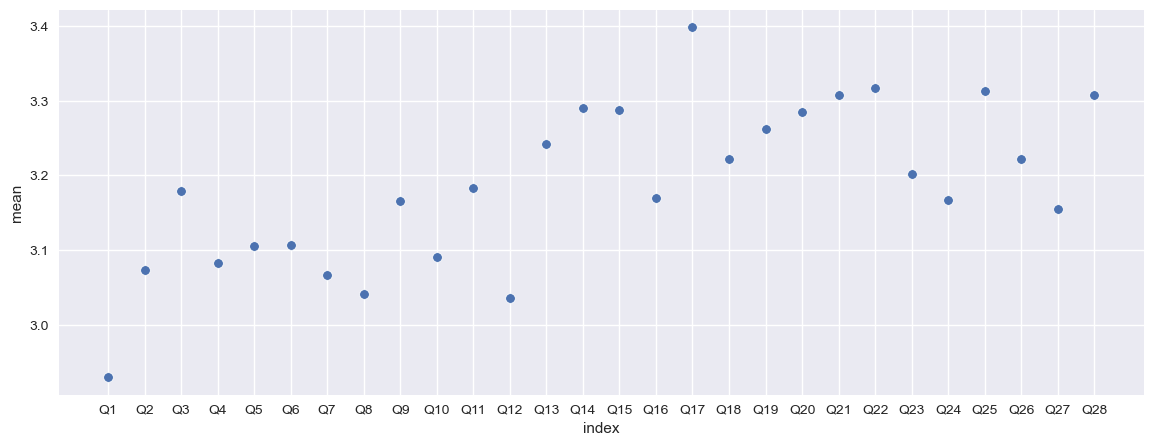

In [18]:
plt.figure(figsize=(14,5))
sns.scatterplot(x='index', y='mean', data=q_mean)

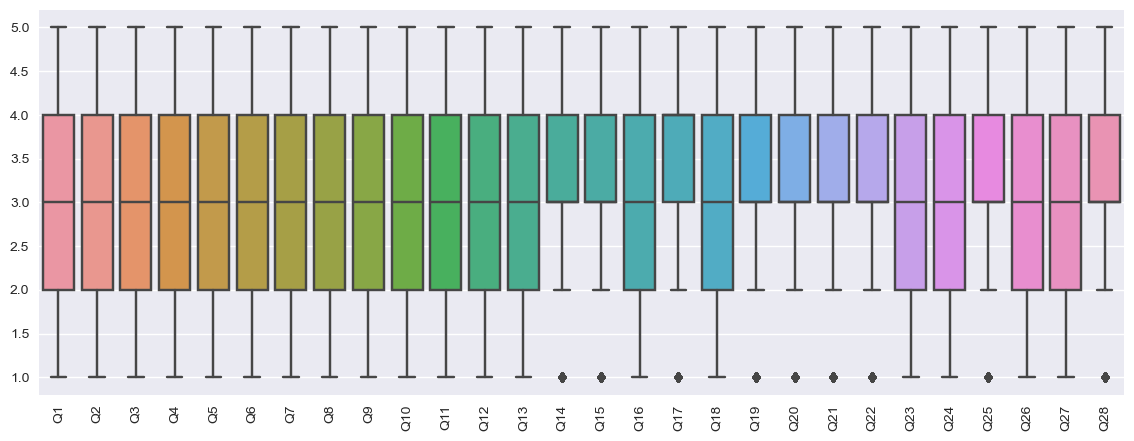

In [45]:
plt.figure(figsize=(14,5))
sns.boxplot(data=df.iloc[:,5:33])
plt.xticks(rotation=90)
plt.show()

# 4. Coorelation Matrix

<AxesSubplot:>

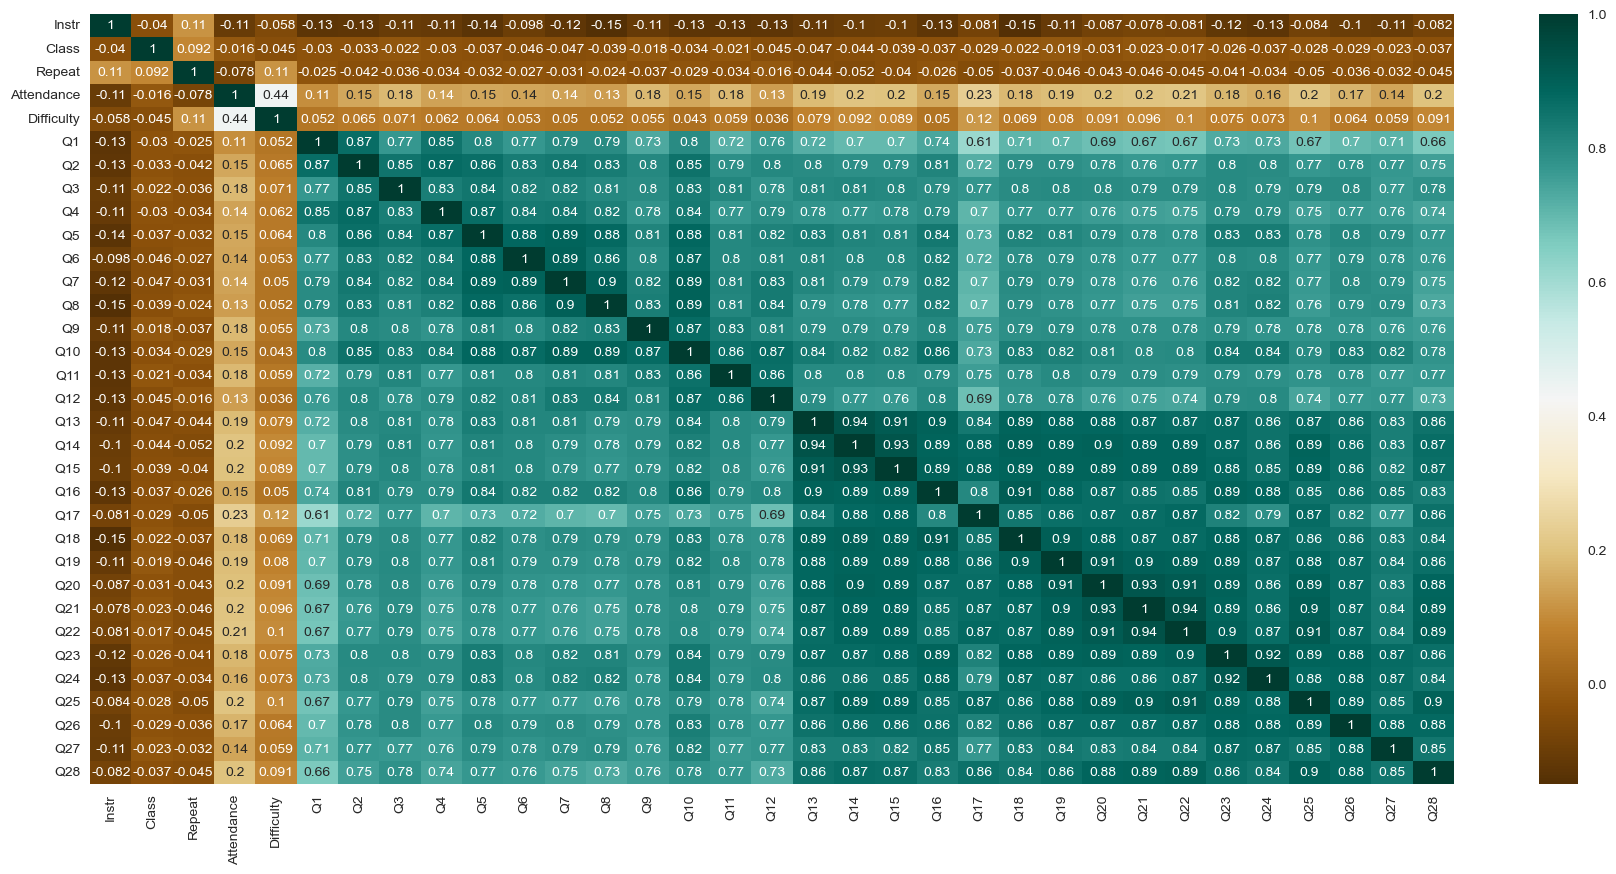

In [20]:
plt.figure(figsize=(22,10))
sns.heatmap(corr, annot=True, cmap='BrBG')

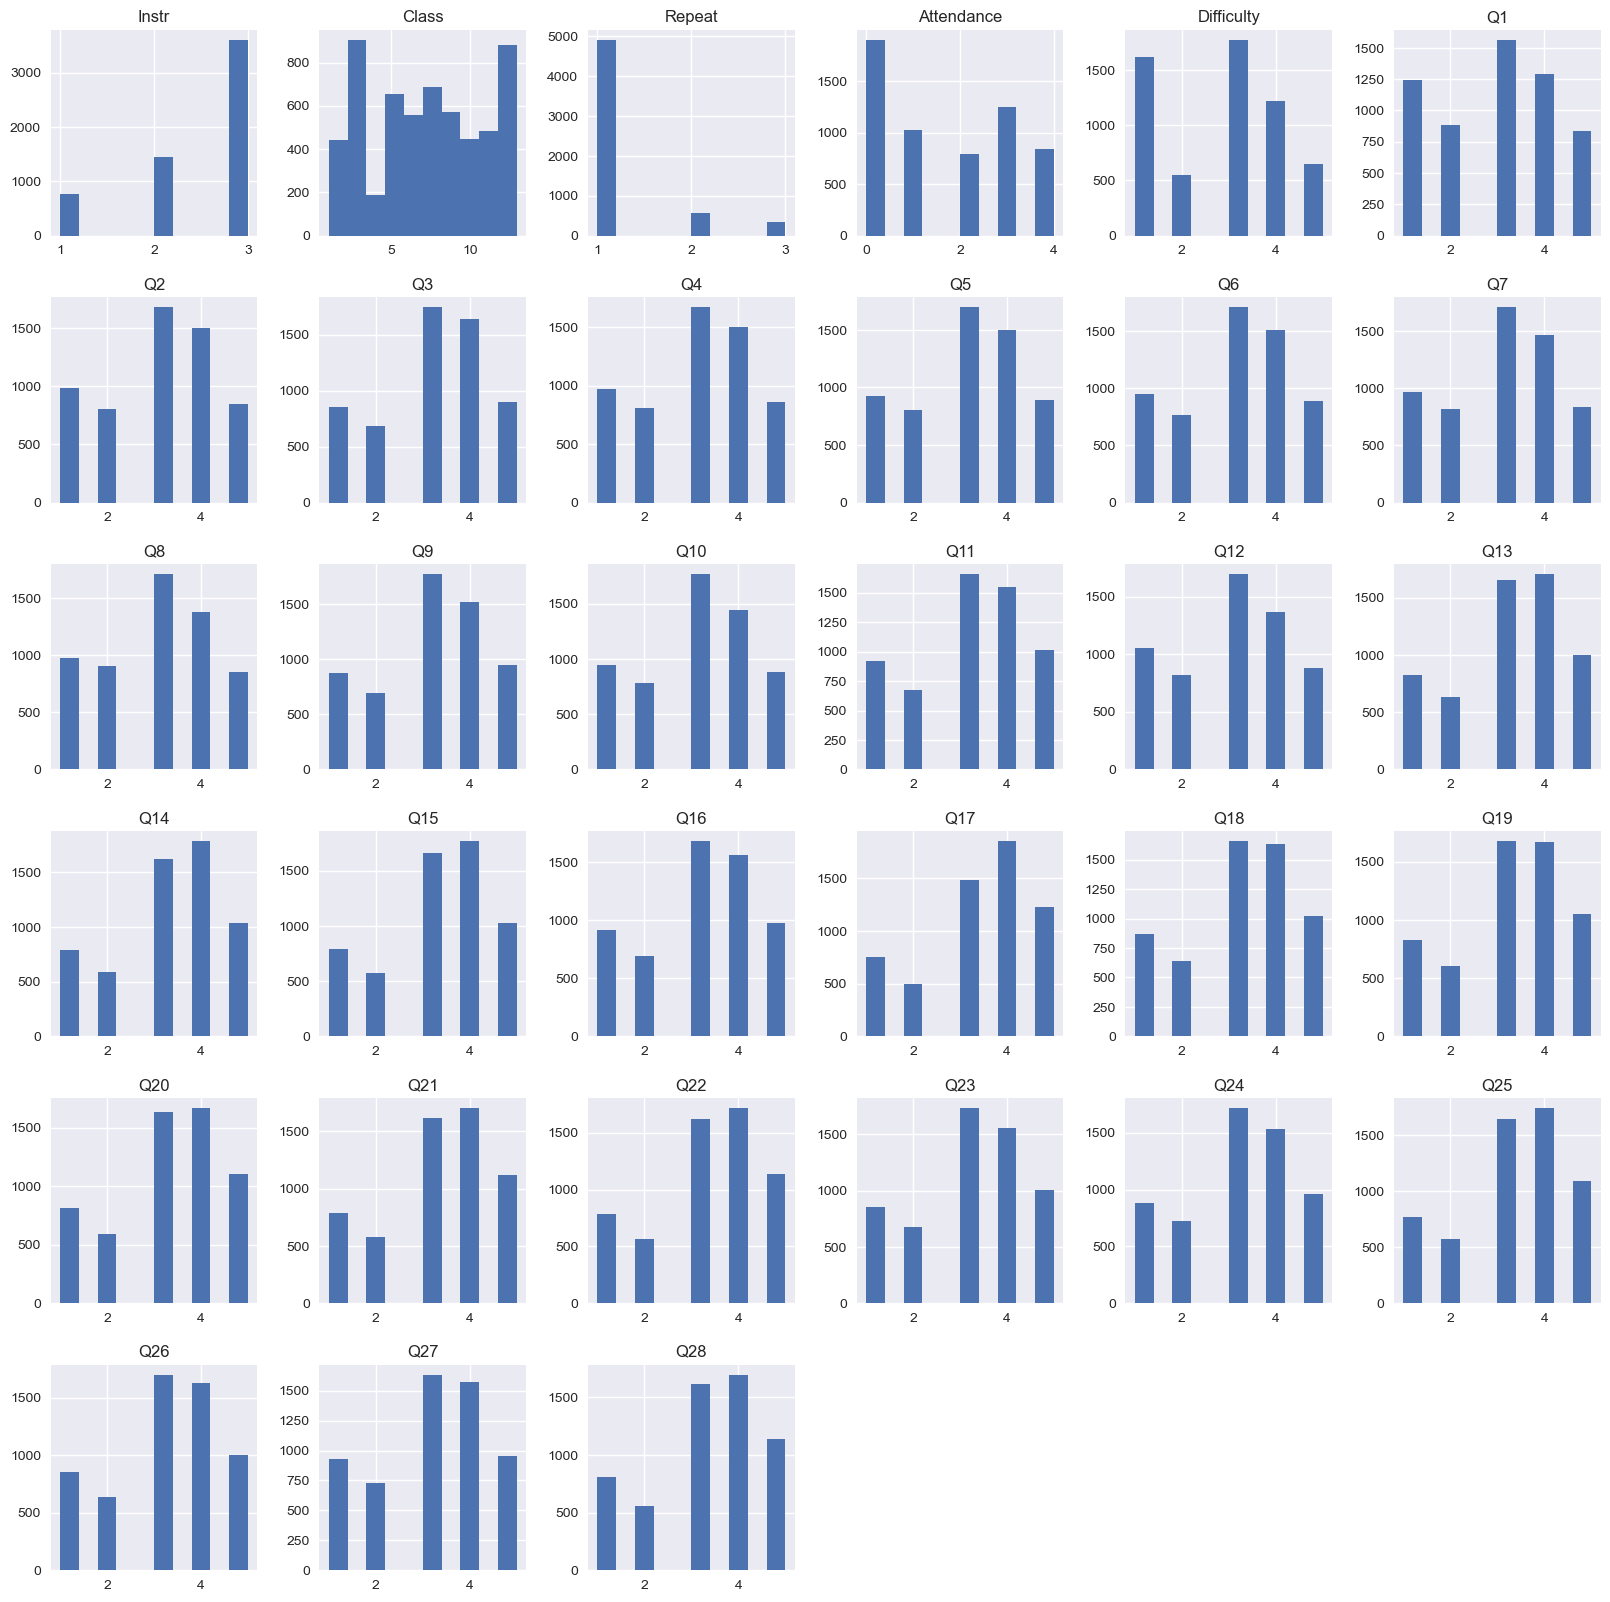

In [21]:
df.hist(figsize=(20,20))
plt.show()

Text(0, 0.5, 'Number of Data')

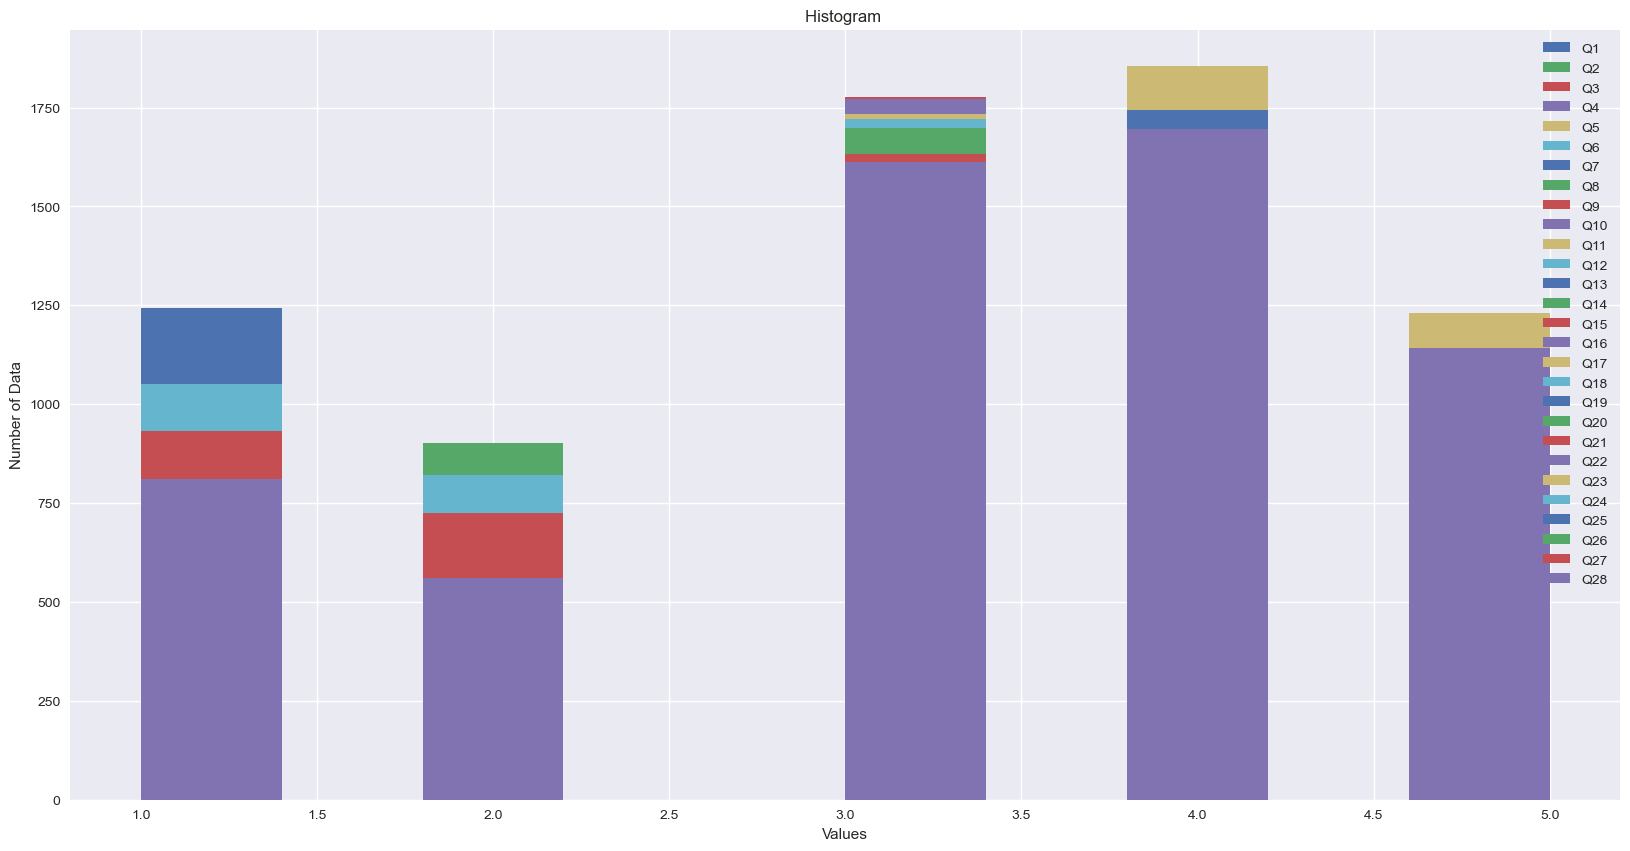

In [22]:
df_hd=df.iloc[:,5:33]
df_hd.plot(kind='hist',figsize=(20,10))
plt.title('Histogram ')
plt.xlabel('Values')
plt.ylabel('Number of Data')

<AxesSubplot:xlabel='Class', ylabel='Repeat'>

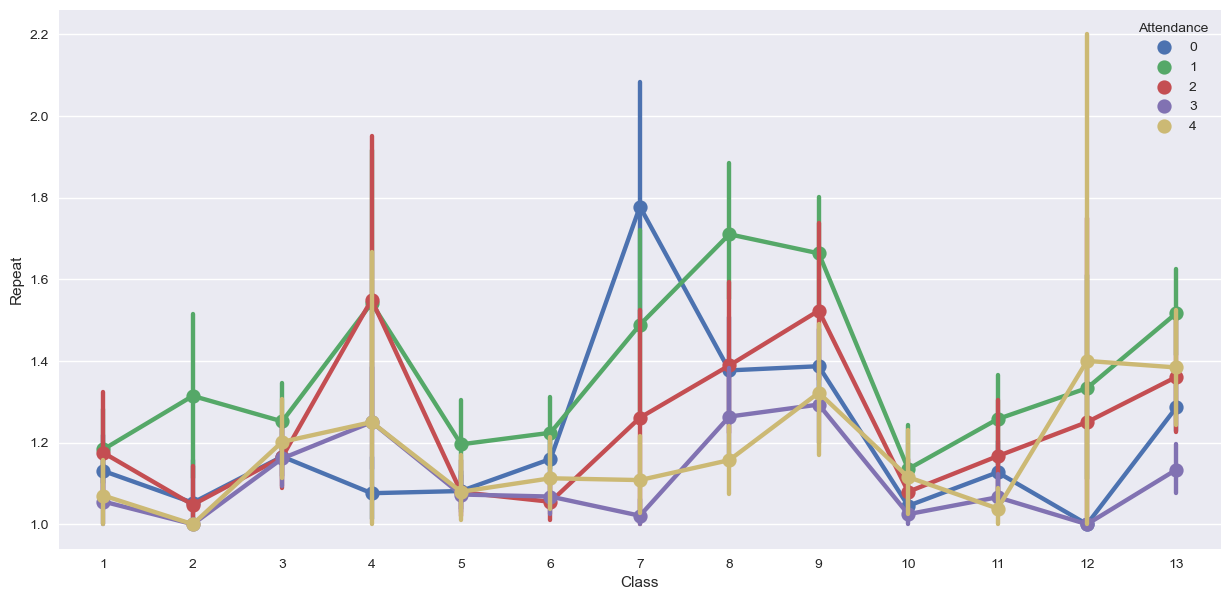

In [23]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,7)
sns.pointplot(x='Class',y='Repeat',data=df,hue='Attendance')

## Principal Component Analysis (PCA)

PCA is a statistical technique for reducing the dimensionality of a dataset. This is accomplished by linearly transforming the data into a new coordinate system

#### Application
* It is mainly used as the dimensionality reduction technique in various AI applications such as Computer Vision, Image Compression, etc.
* It can also be used for finding hidden patterns if data has high dimensions. Some fields where PCA is used are Finance, Data Mining, Psychology, etc.

In [24]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2,random_state=42)

In [25]:
X=df.iloc[:,5:33]
X.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [26]:
X_pca=pca.fit_transform(X)
X_pca

array([[ 0.98901533,  0.52279815],
       [ 0.98901533,  0.52279815],
       [-9.59128851,  0.6408021 ],
       ...,
       [-9.59128851,  0.6408021 ],
       [11.56931918,  0.40479421],
       [11.56931918,  0.40479421]])

#### How much Info we retained from the Dataset

In [27]:
print('Percentage of variance explained by selected components:',pca.explained_variance_ratio_.cumsum()[1]*100)
print('Amount of variance explained by selected components:',pca.explained_variance_.cumsum()[1])

Percentage of variance explained by selected components: 86.71381678891082
Amount of variance explained by selected components: 39.63445230636509


#### How much Singular Value we retained from the Dataset

In [28]:
print('Singular values corresponding to each of the selected components:',pca.singular_values_.cumsum()[1])

Singular values corresponding to each of the selected components: 577.162581516805


# 5. Model Training

In [29]:
from sklearn.cluster import KMeans

#### KMeans with PCA-X

In [30]:
distortions=[]
cluster_range=range(1,7)

for i in cluster_range:
    model=KMeans(n_clusters=i,init='k-means++',n_init=20,verbose=0,random_state=42)
    model.fit(X_pca)
    distortions.append(model.inertia_)

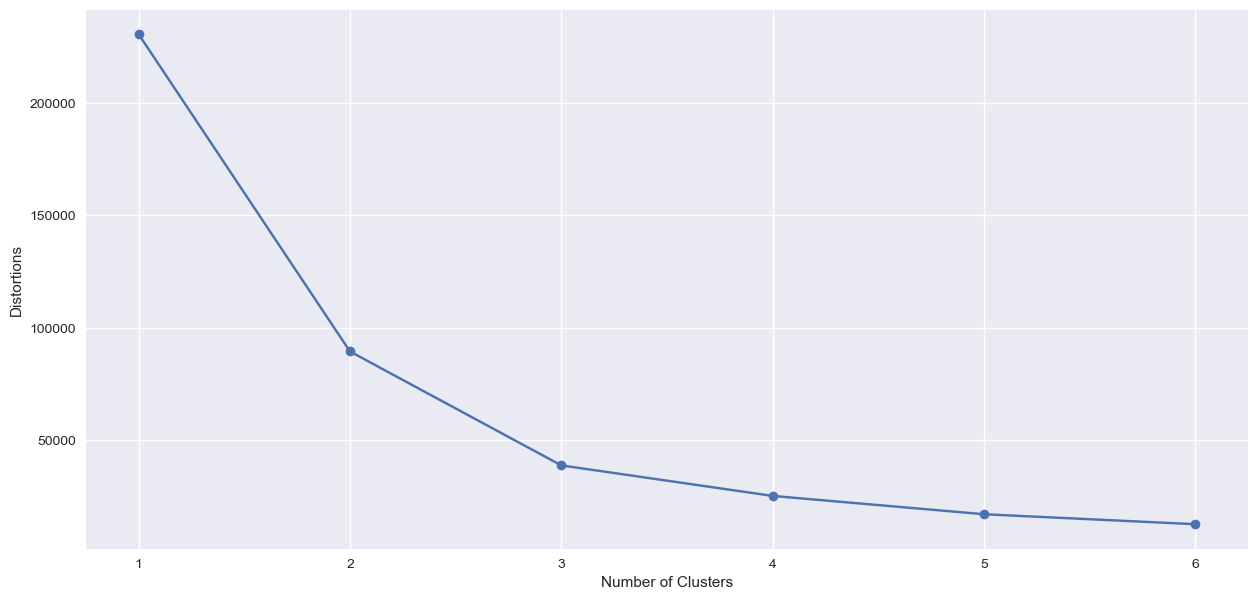

In [31]:
plt.plot(cluster_range,distortions,marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel('Distortions')
plt.show()

#### ~ Come Ups
Based on the Elbow graph , we can go for 3 clusters. But for a change we go for 5 clusters

#### To Use Best Cluster

In [32]:
model=KMeans(n_clusters=5,init='k-means++',n_init=20,verbose=0,random_state=42)
model.fit(X_pca)

KMeans(n_clusters=5, n_init=20, random_state=42)

In [33]:
y=model.predict(X_pca)
y

array([2, 2, 3, ..., 3, 1, 1])

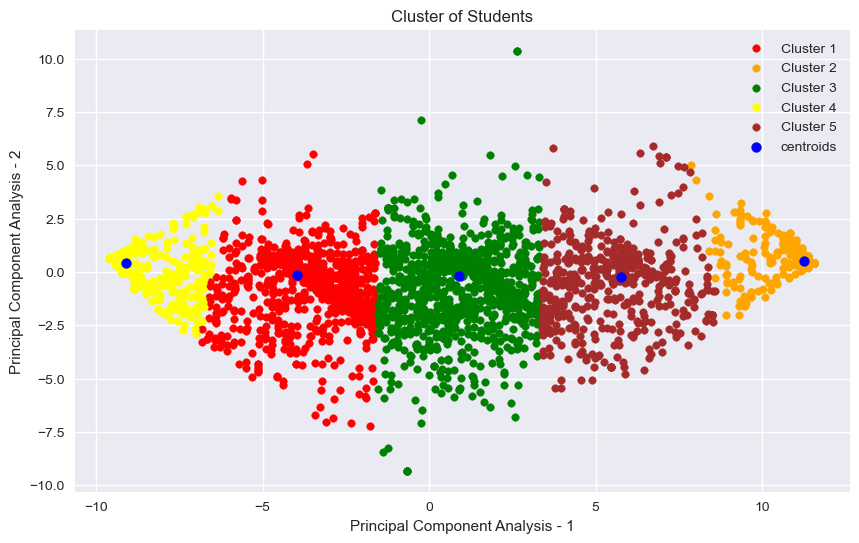

In [34]:
plt.rcParams["figure.figsize"] = (10,6)
plt.scatter(X_pca[y==0,0],X_pca[y==0,1],s=30,c='red',label='Cluster 1')
plt.scatter(X_pca[y==1,0],X_pca[y==1,1],s=30,c='orange',label='Cluster 2')
plt.scatter(X_pca[y==2,0],X_pca[y==2,1],s=30,c='green',label='Cluster 3')
plt.scatter(X_pca[y==3,0],X_pca[y==3,1],s=30,c='yellow',label='Cluster 4')
plt.scatter(X_pca[y==4,0],X_pca[y==4,1],s=30,c='brown',label='Cluster 5')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=50,c='blue',label='centroids')
plt.title('Cluster of Students')
plt.xlabel('Principal Component Analysis - 1')
plt.ylabel('Principal Component Analysis - 2')
plt.legend()
plt.show()

#### ~ Come Ups
Looking at the above graph , I see we have 5 clusters of students who have given like Negative, Neutral and Positive feedback

In [35]:
from collections import Counter
Counter(y)

Counter({2: 1924, 3: 848, 1: 734, 0: 1607, 4: 707})

So we have 1555 students who have given negative ratings overall , 2658 students with positive ratings and 1607 students with nuetral response

#### KMeans with Actual X

In [36]:
model = KMeans(n_clusters=3, init='k-means++', random_state=42)
model.fit(X)

KMeans(n_clusters=3, random_state=42)

In [37]:
y = model.predict(X)
y

array([0, 0, 2, ..., 2, 1, 1])

In [38]:
Counter(y)

Counter({0: 2358, 2: 2223, 1: 1239})

#### Dendogram

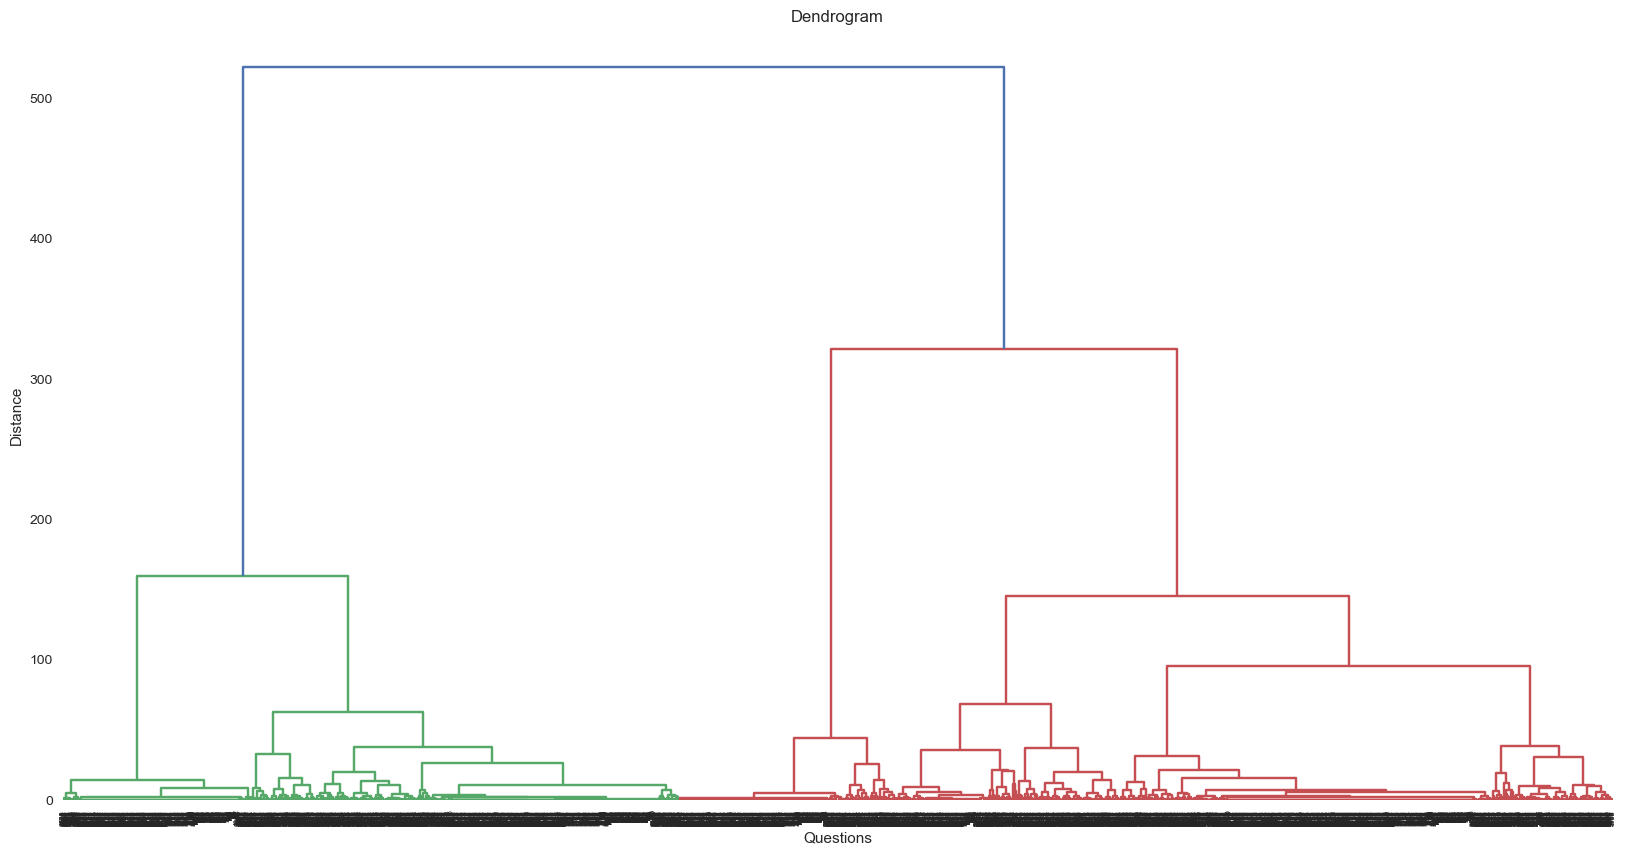

In [39]:
import scipy.cluster.hierarchy as hier
plt.rcParams["figure.figsize"] = (20,10)
dendrogram=hier.dendrogram(hier.linkage(X_pca,method='ward',))
plt.title('Dendrogram')
plt.xlabel('Questions')
plt.ylabel('Distance')
plt.show()

#### Agglomerative Clustering

In [40]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model

AgglomerativeClustering(n_clusters=5)

In [41]:
y = model.fit_predict(X_pca)
y

array([0, 0, 3, ..., 3, 2, 2], dtype=int64)

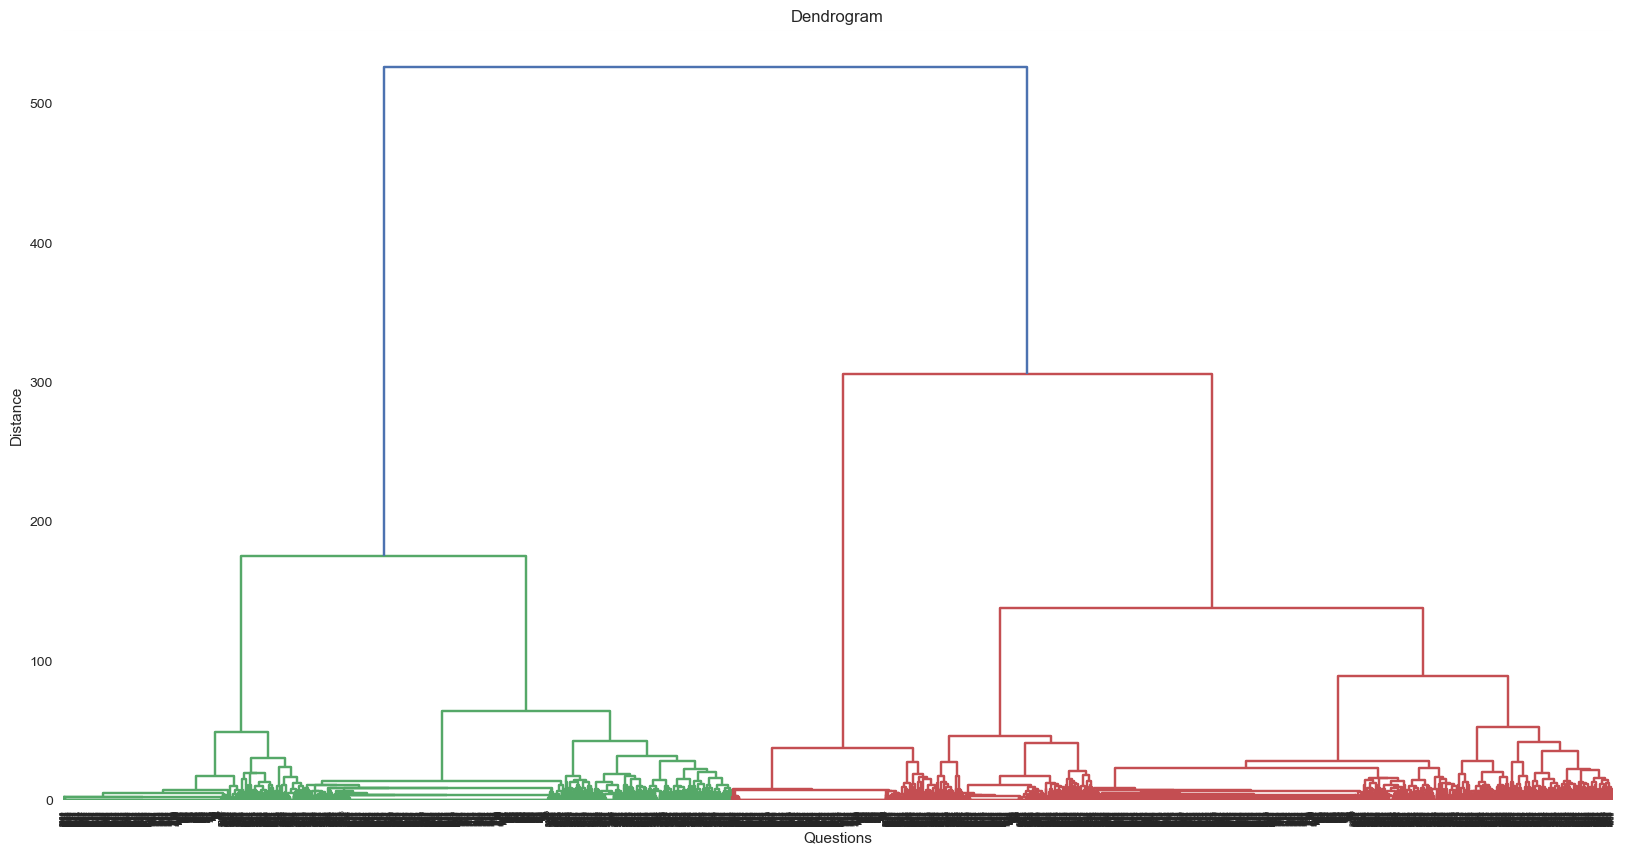

In [42]:
import scipy.cluster.hierarchy as hier
plt.rcParams["figure.figsize"] = (20,10)
dendrogram=hier.dendrogram(hier.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Questions')
plt.ylabel('Distance')
plt.show()

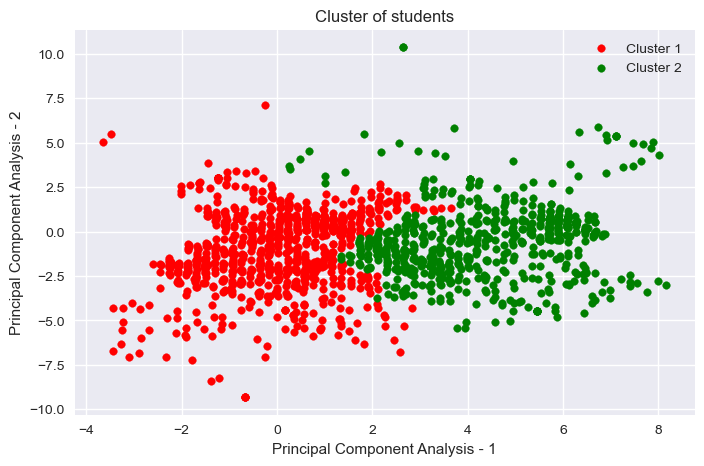

In [43]:
plt.rcParams["figure.figsize"] = (8,5)
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], s=30, c='red', label='Cluster 1')
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], s=30, c='green', label='Cluster 2')

plt.title('Cluster of students')
plt.xlabel('Principal Component Analysis - 1')
plt.ylabel('Principal Component Analysis - 2')
plt.legend()
plt.show()

In [44]:
Counter(y)

Counter({0: 1849, 3: 709, 2: 810, 4: 1609, 1: 843})

#### ~ Come Ups
If we compare the clusters of **Kmeans and Hierarchical Process**, we can see Cluster with **"Red"** ( Negative is matching approximately)

# 6. Summary

1. Percentage of variance explained by selected components: 86.71 %
2. Amount of variance explained by selected components: 39.63
3. Singular values corresponding to each of the selected components: 577.16
4. Based on the Elbow graph , we can go for 3 clusters. But for a change we go for 5 clusters
5. Looking at the KMeans PCA graph , I see we have 5 clusters of students who have given like Negative, Neutral and Positive feedback
6. If we compare the clusters of Kmeans and Hierarchical Process, we can see Cluster with "Red" ( Negative is matching approximately)